<a href="https://colab.research.google.com/github/mmilannaik/BigOCheatSheet/blob/master/HM_03_Retail_MBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

Reference Notebook:-
https://www.kaggle.com/code/spencer1129/market-basket-analysis-bread

In [2]:
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.3 MB/s eta 0:00:00


In [21]:
!pip install pyfpgrowth


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5490 sha256=1bcc3e7aa72865454a8650a5c2e805e639fb50ebe370543912b033414450b2ea
  Stored in directory: /root/.cache/pip/wheels/f2/cf/03/d025f5c38b5e9cfbbe5e68ec539c2bf8dee7a9f8ee14629e2d
Successfully built pyfpgrowth


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from pyvis.network import Network
import datetime as dt
import numpy as np
import pyfpgrowth

# Data Cleaning

In [4]:
df = pd.read_csv("/content/HM_bread_basket.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


Transaction: the transaction id which is unique for each order

Item: a list of items to be ordered/placed by customer

date_time: the date and time of the transaction.

period_day: the period of the day when a customer ordered/placed

weekday_weekend: is the day is weekend (sat or sun) or a weekday.

In [5]:
df.head(3)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend


In [6]:
df['date_time']=pd.to_datetime(df['date_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      20507 non-null  int64         
 1   Item             20507 non-null  object        
 2   date_time        20507 non-null  datetime64[ns]
 3   period_day       20507 non-null  object        
 4   weekday_weekend  20507 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 801.2+ KB


/tmp/ipython-input-6-3119678500.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time']=pd.to_datetime(df['date_time'])


In [7]:
df['time']=df['date_time'].dt.time
df['hour']=df['date_time'].dt.hour

In [8]:
df['month'] = df['date_time'].dt.month
df['month name'] = df['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May','June','July','August','September','October','November','December'])

In [9]:
df['day'] = df['date_time'].dt.day
df['weekday'] = df['date_time'].dt.weekday
df['weekday name'] = df['weekday'].replace([0,1,2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [10]:
df.head(3)

,Transaction,Item,date_time,period_day,weekday_weekend,time,hour,month,month name,day,weekday,weekday name
0,1,Bread,2016-10-30 09:58:00,morning,weekend,09:58:00,9,10,October,30,6,Sunday
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10:05:00,10,10,October,30,6,Sunday
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10:05:00,10,10,October,30,6,Sunday


# EDA

In [11]:
popular = df['Item'].value_counts()
(df['Item'].value_counts(normalize=True)*100).head(20)

,proportion
Item,
Coffee,26.678695
Bread,16.213976
Tea,6.997611
Cake,4.998293
Pastry,4.174184
Sandwich,3.759692
Medialuna,3.003852
Hot chocolate,2.877066
Cookies,2.633247


In [13]:
type(popular)

pandas.core.series.Series

## Top items by Customer

/tmp/ipython-input-12-2283553626.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = popular.head(20).index, y = popular.head(20).values, palette = 'hls')


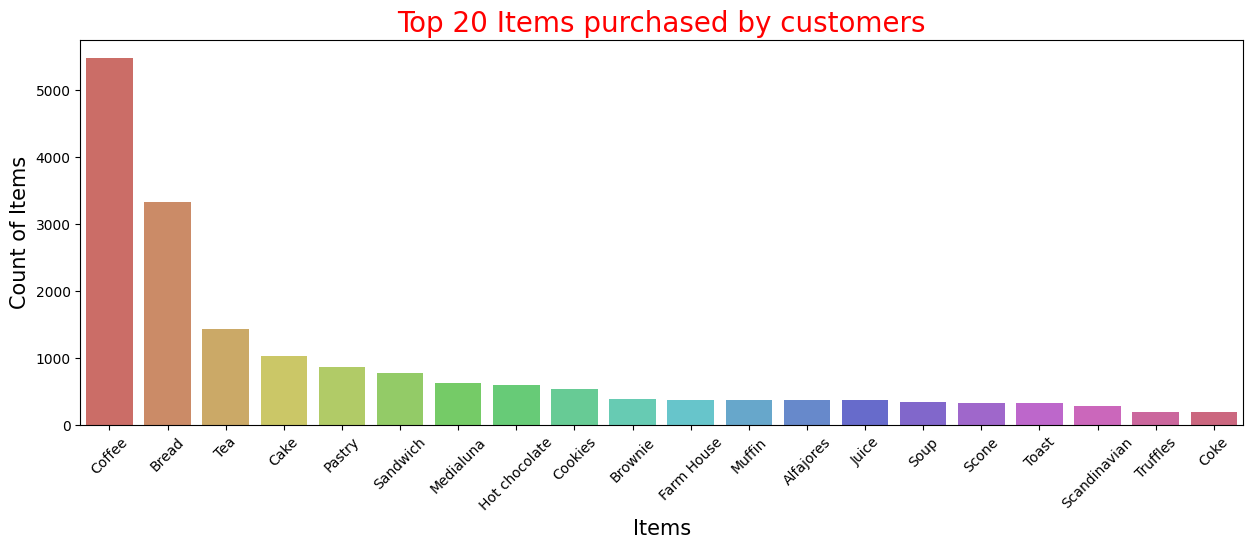

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x = popular.head(20).index, y = popular.head(20).values, palette = 'hls')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'red', size = 20)
plt.show()

As you can see, the most popular (26%) of purchases is Coffee, the next is (16%) Bread, then goes Tea (6.99%).

## No of orders/Month

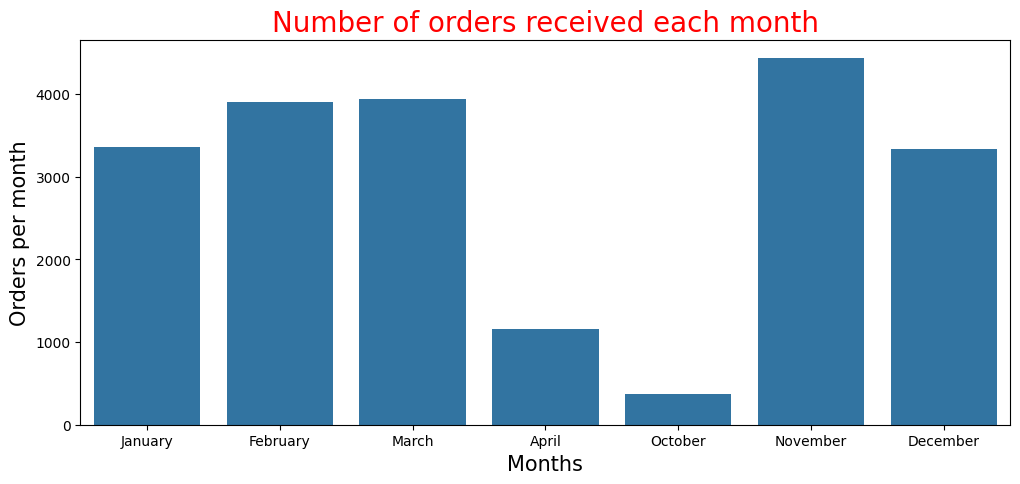

In [14]:
monthTran = df.groupby(['month','month name'])['Transaction'].count().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data = monthTran[['month name', 'Transaction']], x = "month name", y = "Transaction")
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month', color = 'red', size = 20)
plt.show()

As you can see, the largest number of purchases corresponds to March and November. Also, the most active buyers are in winter. In summer and early autumn, activity is the lowest.

## Week day transactions

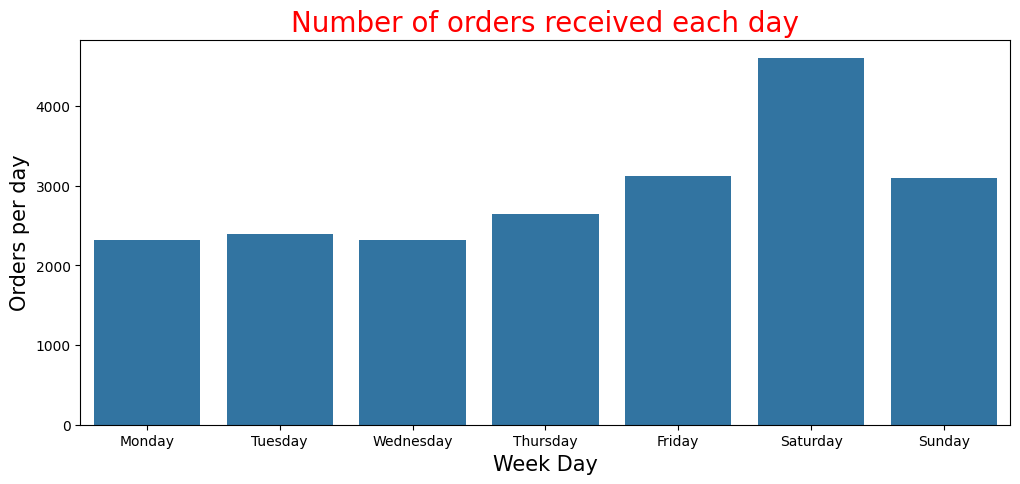

In [15]:
weekTran = df.groupby(['weekday','weekday name'])['Transaction'].count().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(data = weekTran[['weekday name', 'Transaction']], x = "weekday name", y = "Transaction")
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day', color = 'red', size = 20)
plt.show()

As you can see from the plot, buyers are active throughout the week. There are no days with no purchases. You can see that the maximum number of purchases falls upon Saturday.

## Weekday vs weekend

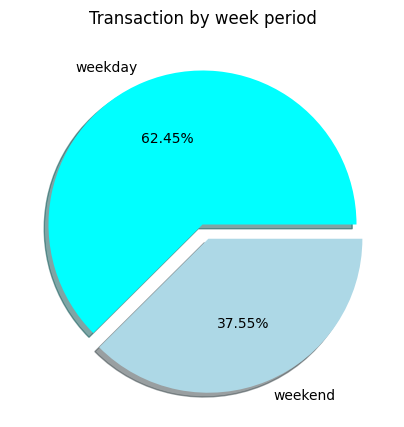

In [16]:
size = size = df['weekday_weekend'].value_counts()
labels = size.index.values
colors = ["cyan", "lightblue"]
explode = [0, 0.1]

plt.figure(figsize=(12,5))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('Transaction by week period')
plt.show()

You can see that 62% of purchases are made on weekdays and 37% are made at the weekend.

## Transaction Hour/day

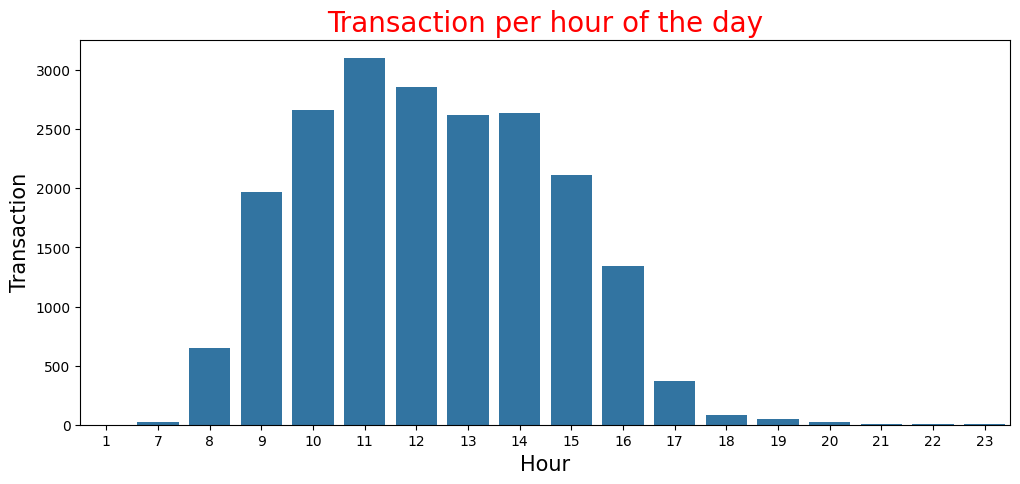

In [17]:
coutbyhour=coutbyhour=df.groupby('hour')['Transaction'].count().reset_index()
coutbyhour.sort_values('hour',inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data=coutbyhour, x='hour', y='Transaction')
plt.xlabel('Hour', size = 15)
plt.ylabel('Transaction', size = 15)
plt.title('Transaction per hour of the day', color = 'red', size = 20)
plt.show()

It is clearly seen that consumers become the most active starting from 9 in the morning to 4 in the evening.

## Transaction for time of day

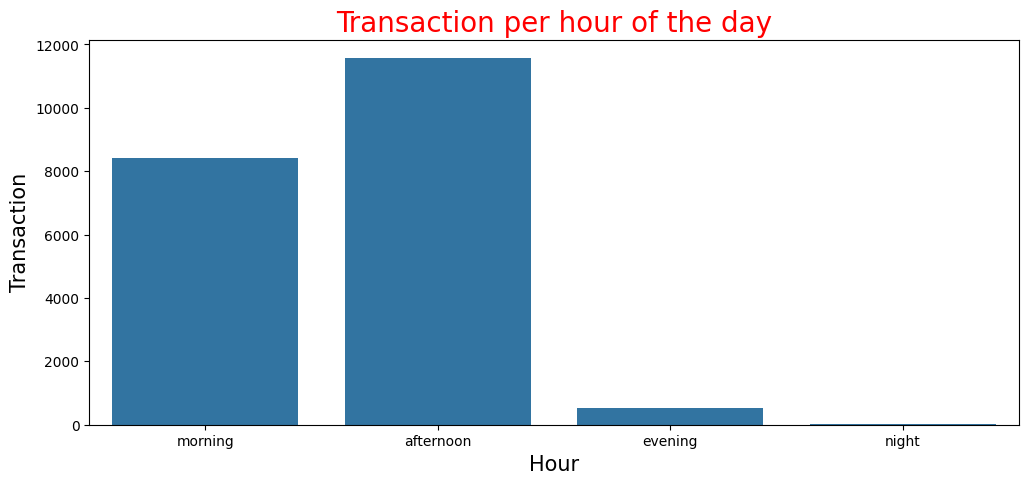

In [18]:
coutbyweekday=coutbyweekday=df.groupby('period_day')['Transaction'].count().reset_index()
coutbyweekday.loc[:,"dayorder"] = [1, 2, 0, 3]
coutbyweekday.sort_values("dayorder",inplace=True)
plt.figure(figsize=(12,5))
sns.barplot(data=coutbyweekday, x='period_day', y='Transaction')
plt.xlabel('Hour', size = 15)
plt.ylabel('Transaction', size = 15)
plt.title('Transaction per hour of the day', color = 'red', size = 20)
plt.show()

The graph confirms that buyers become most active during the afternoon.

# Association Rules

In [19]:
transactions = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


In [20]:
basket = transactions.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
basket

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Transaction Constructions

In [25]:
grouped = df.groupby('Transaction')['Item'].apply(list)
grouped

,Item
Transaction,
1,[Bread]
2,"[Scandinavian, Scandinavian]"
3,"[Hot chocolate, Jam, Cookies]"
4,[Muffin]
5,"[Coffee, Pastry, Bread]"
...,...
9680,[Bread]
9681,"[Truffles, Tea, Spanish Brunch, Christmas common]"
9682,"[Muffin, Tacos/Fajita, Coffee, Tea]"


In [26]:
transactions = grouped.tolist()

In [32]:
transactions = df.groupby('Transaction')['Item'].apply(lambda items : list(set(items))).tolist()

In [34]:
T = len(transactions)
print(f"Total transactions : {T:,}")

Total transactions : 9,465


## FP Growth

In [36]:
MIN_SUP_REL = 0.02        # 2% relative support
MIN_SUP_ABS = max(2, int(MIN_SUP_REL * T))
print(f"Using min_support = {MIN_SUP_REL*100:.1f}%  ({MIN_SUP_ABS} tx)")
patterns = pyfpgrowth.find_frequent_patterns(transactions, MIN_SUP_ABS)
pattern_counts = {frozenset(k if isinstance(k, tuple) else (k,)): v for k, v in patterns.items()}

Using min_support = 2.0%  (189 tx)


In [37]:
pattern_counts

{frozenset({'Truffles'}): 192,
 frozenset({'Scandinavian'}): 275,
 frozenset({'Toast'}): 318,
 frozenset({'Coffee', 'Toast'}): 224,
 frozenset({'Soup'}): 326,
 frozenset({'Scone'}): 327,
 frozenset({'Alfajores'}): 344,
 frozenset({'Muffin'}): 364,
 frozenset({'Juice'}): 365,
 frozenset({'Coffee', 'Juice'}): 195,
 frozenset({'Farm House'}): 371,
 frozenset({'Brownie'}): 379,
 frozenset({'Cookies'}): 515,
 frozenset({'Coffee', 'Cookies'}): 267,
 frozenset({'Hot chocolate'}): 552,
 frozenset({'Coffee', 'Hot chocolate'}): 280,
 frozenset({'Medialuna'}): 585,
 frozenset({'Coffee', 'Medialuna'}): 333,
 frozenset({'Sandwich'}): 680,
 frozenset({'Coffee', 'Sandwich'}): 362,
 frozenset({'Bread', 'Pastry'}): 276,
 frozenset({'Coffee', 'Pastry'}): 450,
 frozenset({'Bread', 'Cake'}): 221,
 frozenset({'Cake', 'Tea'}): 225,
 frozenset({'Cake', 'Coffee'}): 518,
 frozenset({'Bread', 'Tea'}): 266,
 frozenset({'Coffee', 'Tea'}): 472,
 frozenset({'Bread'}): 3097,
 frozenset({'Bread', 'Coffee'}): 852,
 fr

In [42]:
# 4. Association Rules (confidence ≥ 50 %) -----------------------------
MIN_CONF = 0.5
raw_rules = pyfpgrowth.generate_association_rules(patterns, confidence_threshold=MIN_CONF)
print(f"Rules generated: {len(raw_rules):,}")

Rules generated: 6


In [43]:
raw_rules

{('Toast',): (('Coffee',), 0.7044025157232704),
 ('Juice',): (('Coffee',), 0.5342465753424658),
 ('Cookies',): (('Coffee',), 0.5184466019417475),
 ('Hot chocolate',): (('Coffee',), 0.5072463768115942),
 ('Medialuna',): (('Coffee',), 0.5692307692307692),
 ('Sandwich',): (('Coffee',), 0.5323529411764706)}

In [44]:
# 5. Build KPI DataFrame ----------------------------------------------
rule_rows = []
for antecedent, (consequent, conf) in raw_rules.items():
    ant = frozenset(antecedent)
    cons = frozenset(consequent if isinstance(consequent, tuple) else (consequent,))
    union = ant | cons
    # Counts & supports
    supp_ant = pattern_counts.get(ant, 0)
    supp_cons = pattern_counts.get(cons, 0)
    supp_union = pattern_counts.get(union, 0)
    support_ant = supp_ant / T
    support_cons = supp_cons / T
    support_union = supp_union / T
    # KPIs
    lift = conf / support_cons if support_cons else np.nan
    leverage = support_union - (support_ant * support_cons)
    conviction = (1 - support_cons) / (1 - conf) if conf < 1 else np.inf
    rule_rows.append({
        'Antecedent': ', '.join(sorted(ant)),
        'Consequent': ', '.join(sorted(cons)),
        'Support': support_union,
        'Confidence': conf,
        'Lift': lift,
        'Leverage': leverage,
        'Conviction': conviction
    })

In [45]:
rules_df = pd.DataFrame(rule_rows)

In [46]:
# 6. Display Top Rules by KPI -----------------------------------------
print("\nTop‑10 Rules by Lift:")
print(rules_df.sort_values('Lift', ascending=False).head(10).round(3))
print("\nTop‑10 Rules by Conviction:")
print(rules_df.sort_values('Conviction', ascending=False).head(10).round(3))


Top‑10 Rules by Lift:
      Antecedent Consequent  Support  Confidence   Lift  Leverage  Conviction
0          Toast     Coffee    0.024       0.704  1.472     0.008       1.765
4      Medialuna     Coffee    0.035       0.569  1.190     0.006       1.211
1          Juice     Coffee    0.021       0.534  1.117     0.002       1.120
5       Sandwich     Coffee    0.038       0.532  1.113     0.004       1.115
2        Cookies     Coffee    0.028       0.518  1.084     0.002       1.083
3  Hot chocolate     Coffee    0.030       0.507  1.060     0.002       1.059

Top‑10 Rules by Conviction:
      Antecedent Consequent  Support  Confidence   Lift  Leverage  Conviction
0          Toast     Coffee    0.024       0.704  1.472     0.008       1.765
4      Medialuna     Coffee    0.035       0.569  1.190     0.006       1.211
1          Juice     Coffee    0.021       0.534  1.117     0.002       1.120
5       Sandwich     Coffee    0.038       0.532  1.113     0.004       1.115
2        Coo

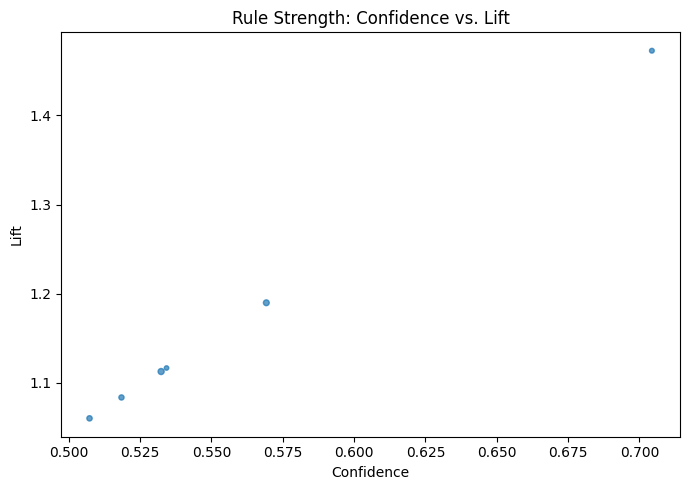


Rules with Lift ≥ 1.17 (top quartile):
  Antecedent Consequent  Support  Confidence   Lift  Leverage  Conviction
0      Toast     Coffee    0.024       0.704  1.472     0.008       1.765
1  Medialuna     Coffee    0.035       0.569  1.190     0.006       1.211


In [47]:
# 7. Visual – Confidence vs Lift --------------------------------------
plt.figure(figsize=(7,5))
plt.scatter(rules_df['Confidence'], rules_df['Lift'], s=500*rules_df['Support'], alpha=0.7)
plt.title('Rule Strength: Confidence vs. Lift')
plt.xlabel('Confidence'); plt.ylabel('Lift')
plt.tight_layout(); plt.show()

# Highlight best by Lift
q75 = rules_df['Lift'].quantile(0.75)
print(f"\nRules with Lift ≥ {q75:.2f} (top quartile):")
print(rules_df[rules_df['Lift'] >= q75]
        .sort_values('Lift', ascending=False)
        .reset_index(drop=True)
        .round(3))